<a href="https://colab.research.google.com/github/eginez/fastbook/blob/master/eginez_04_learn_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install -q fastbook
!pip install -q fastai

Build a 2 layer nn to approximate f(x)
I need a 
- define a synthetic function that can learn from w and biases
- create data sets and data loaders
- Loss Function
- Accuracy function
- Apply the steps for DL
  - init steps
  - do a prediction
    - in a model that contains 2 linear functions separated by a sigmoid.
  - calc loss
  - calc gradient
  - either stop or keep iterating.


In [84]:
from fastai import *
from fastbook import *
import torch
f_target = lambda x: torch.sin(x**2) + torch.cos(x)

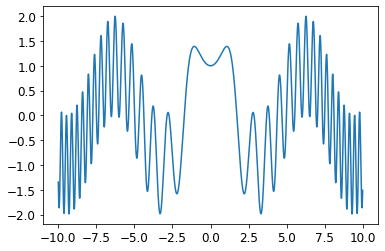

In [85]:
valid_x_input = torch.arange(-10, 10, 0.01)
train_x = f_target(valid_x_input)
train_y = f_target(valid_x_input)
plt.plot(valid_x_input, f_target(valid_x_input))

In [86]:
def sigmoid(x): return 1/(1+torch.exp(-x))


In [87]:
def loss(pred, target): 
  return ((target - pred)**2).mean().sqrt()

In [88]:
def show_predictions(pred, x_model,x_input, ax=None):
  x_data = x_input.detach().numpy()
  if ax is None: ax= plt.subplots(figsize=(15,15))[1]
  ax.plot(x_data, f_target(x_input))
  ax.scatter(x_model, pred, color='red')


In [89]:
def accuracy(pred, target): return ((pred - target).abs() < 0.0001).float().mean()

In [90]:
def init(size): return (torch.randn(size)).requires_grad_()

def linear1(x, params): 
  w, b = params
  return x@w + b #@ = matrix mult

def simple_nn(x, params):
  w, b, w2, b2 = params
  res = linear1(x, (w, b))
  res = res.max(torch.tensor(0.0))
  res = linear1(res, (w2, b2))
  return res

def calc_grad(xbatch, ybatch, model, loss_fn, params):
  preds = model(xbatch, params)
  loss = loss_fn(preds, ybatch)
  loss.backward()
  return preds,loss

def train_epoch(model, lr, params, xbatch, ybatch, loss_fn):
  preds, loss = calc_grad(xbatch, ybatch, model, loss_fn, params)
  for p in params:
    p.data = p.data - lr * p.grad.data
    p.grad.zero_()
  return preds, loss

In [91]:
def create_rand_in(ds, bs):
  import random
  idx = random.sample(range(len(ds)), k=bs)
  test_x, _ = valid_x_input[idx].sort()
  return test_x

In [92]:
torch.manual_seed(100)
def train_model(epochs, model, params, lr, x, y, loss_fn):
  preds = None
  count = 0
  for i in range(epochs):
    preds, loss = train_epoch(model, lr, params, x, y, loss_fn)
    if count % 1000 == 0:
      print(f"Loss: {loss}, Acc: {accuracy(preds, train_y)}")
      count = 0
    count += 1

  return preds

## Choose 500 points randomly to train the model
x_input = create_rand_in(valid_x_input, 500)
train_y = f_target(x_input)
size_of_params = len(x_input)
params = (init((size_of_params)), init(size_of_params), init(size_of_params), init(size_of_params))
preds =train_model(30_000, simple_nn, params, 0.1, x_input, train_y, loss)



Loss: 12.749184608459473, Acc: 0.0
Loss: 1.19855535030365, Acc: 0.0
Loss: 0.9985557198524475, Acc: 0.0
Loss: 0.7985565662384033, Acc: 0.0
Loss: 0.5985558032989502, Acc: 0.0
Loss: 0.39855557680130005, Acc: 0.0
Loss: 0.19855567812919617, Acc: 0.0
Loss: 0.0001553409529151395, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115
Loss: 0.00015534668636973947, Acc: 0.4860000014305115


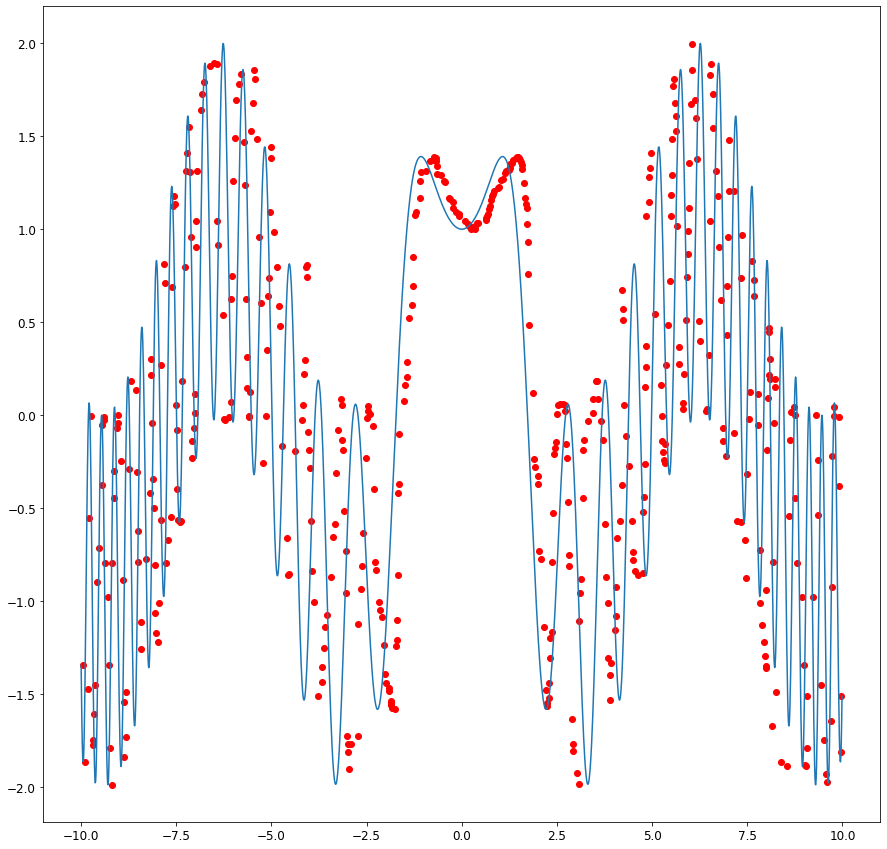

In [93]:
# choose another 500 points to visualize the pred
test_x = create_rand_in(valid_x_input, len(x_input))
# compute the predictions with our trained model
preds = simple_nn(test_x, params)
show_predictions(preds.detach().numpy(), test_x, valid_x_input)
